# IPython Notebook For AQO Simulation Work in Aspuru-Guzik Group at Harvard University in Summer of 2015.

# Hp Characterization Demo

Characterizing Hp for 100 instances of each alpha value possible for given number of particles = 10.

Enter number of particles/spins in the system: 
10
Enter number of instances to try: 
100

Number of particles = 10
# Clauses | Average # of Clauses Not SAT | Average Degeneracy | #Uniq. Max2Sat Sol. | #Uniq. 2Sat Sol. | Alpha
[[  1.00000000e+00   0.00000000e+00   7.68000000e+02   0.00000000e+00
    0.00000000e+00   1.00000000e-01]
 [  2.00000000e+00   0.00000000e+00   5.82400000e+02   0.00000000e+00
    0.00000000e+00   2.00000000e-01]
 [  3.00000000e+00   0.00000000e+00   3.98400000e+02   0.00000000e+00
    0.00000000e+00   3.00000000e-01]
 ..., 
 [  1.78000000e+02   4.31000000e+01   1.21600000e+02   0.00000000e+00
    0.00000000e+00   1.78000000e+01]
 [  1.79000000e+02   4.40000000e+01   2.56000000e+02   0.00000000e+00
    0.00000000e+00   1.79000000e+01]
 [  1.80000000e+02   4.50000000e+01   1.02400000e+03   0.00000000e+00
    0.00000000e+00   1.80000000e+01]]

Number of particles = 2
# Clauses | Average # of Clauses Not SAT | Average Degeneracy | #Uniq. Max2Sat Sol. | #Uniq. 2Sat 

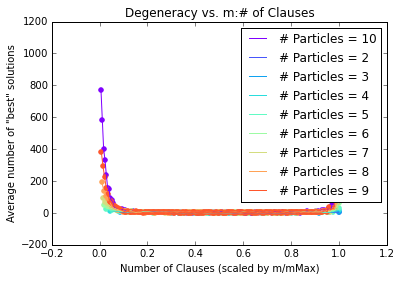

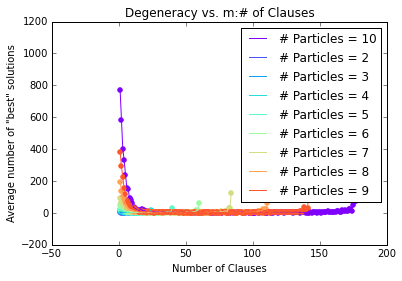

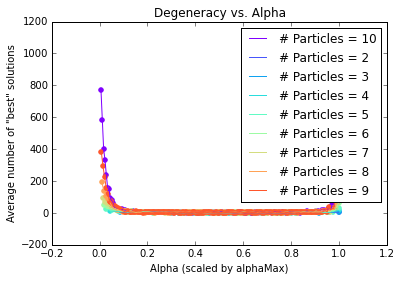

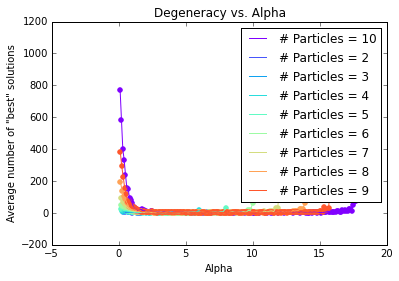

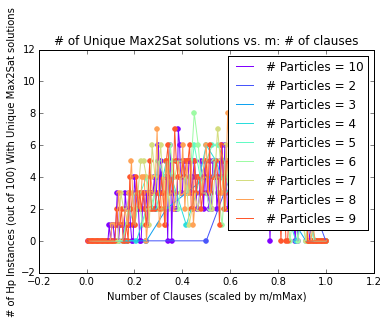

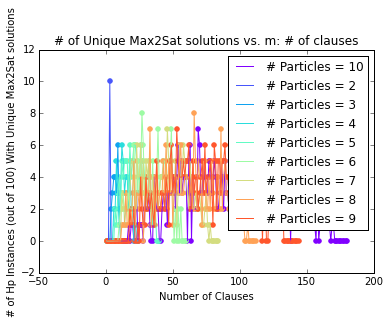

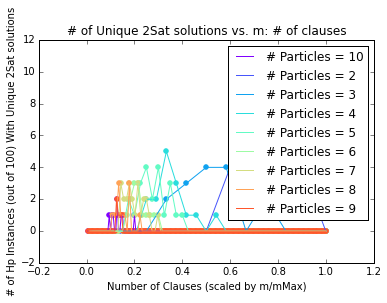

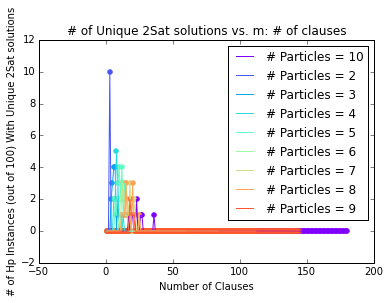

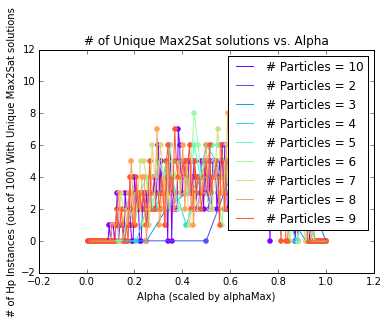

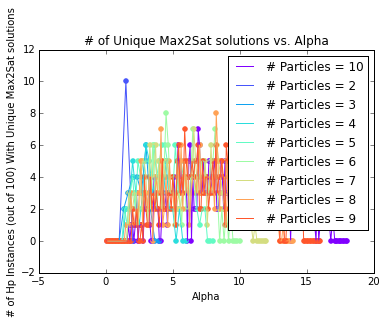

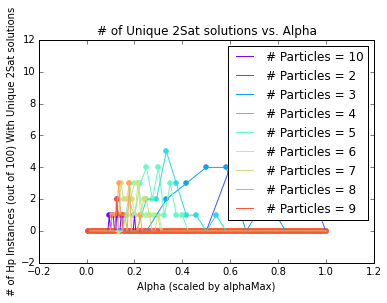

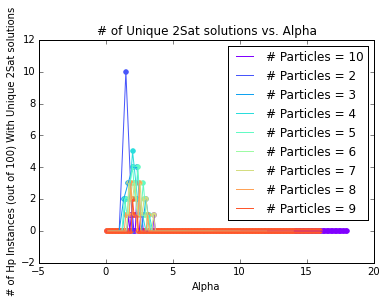

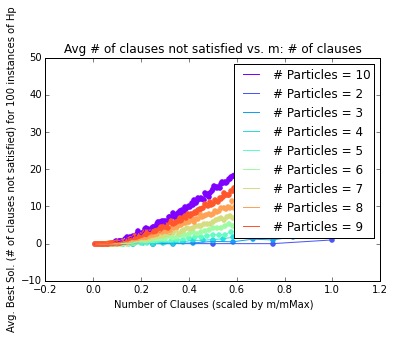

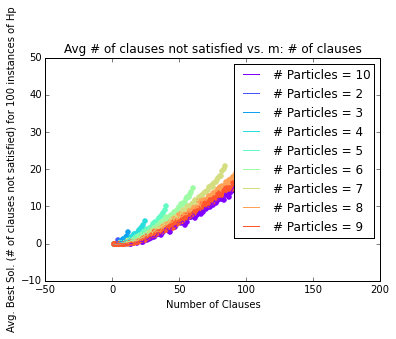

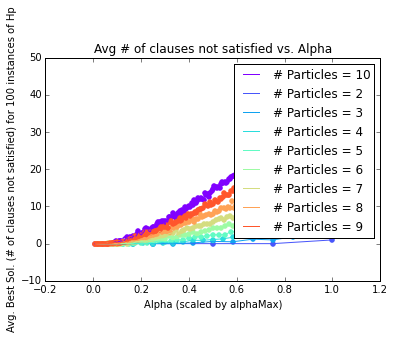

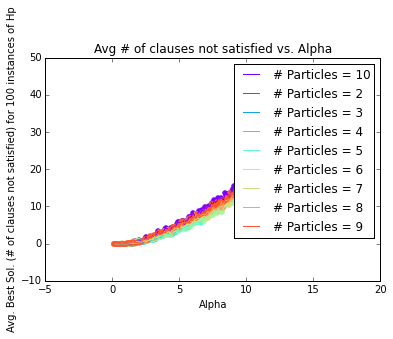

In [5]:
# Author: Kelsey C. Justis
# Date: 08/14/2015
# Summary: Program takes in a given number of clauses and
# Input: 
#-n: integer number of particles
#-m: integer number of clauses
#-i: integer number of instances to check
# Output: 
#- Break down of how many times a given number of solutions exists for the i number of instances of the given n and m.

import random
import numpy as np
from makeHp import makeHp
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Characterizes Hp for entered number n of particles, number of clauses. and number of instances entered, i.
def charHp(numParticles, numClauses, numInstances = 100):

    # Initialize counter objects.
    uniqSolCtr = 0                  # Counts number of unique Max2Sat solutions.
    satSolCtr = 0                   # Counts number of unique 2Sat solutions.
    sumNumBestAssgs = 0.      # Number of "best" assignments for given Hp.
    sumNumClauseNotSat = 0.   # How many clauses are not satisfied for this Hp.
    alpha = float(float(numClauses)/float(numParticles))

    # For each instance.
    for i in range(numInstances):

        # Create a new Hp with given number of particles and clauses.
        results = makeHp(numParticles,numClauses)

        # Get smallest number of assignments not satisfied.
        numClausesNotSat = results[1]

        # Get number of assignments with this number of unsatisfied assignments.
        numBestAssgs = len(results[2])

        # Check to see if this Hp has a unique solution.
        if (numBestAssgs == 1):
            uniqSolCtr += 1
            if (numClausesNotSat == 0):
                satSolCtr += 1
        sumNumClauseNotSat += numClausesNotSat
        sumNumBestAssgs += numBestAssgs

    avgNumClausesNotSat = sumNumClauseNotSat/numInstances
    avgNumBestAssgs = sumNumBestAssgs/numInstances

    return avgNumClausesNotSat, avgNumBestAssgs, uniqSolCtr, satSolCtr, alpha

# Characterizes Hp from 2:entered number n of particles and from 1:mMax number of clauses with number of instances entered, i.
def charHpRange(numParticles, numInstances = 100):

    # Initialize dictionary of information for each number of particles.
    charData = {}

    # For each particle number up to n.
    for particleNum in range(2,numParticles + 1):

        # Maximum number of unique clauses depending on n.
        mMax = 2*particleNum*(particleNum - 1)

        # Intialize data matrix for this particle number.
        dataMatrix = np.zeros((mMax,6))
        # For each clause up to mMax.
        for numClauses in range(1, mMax+1):

            # Add row entry for current number of clauses. Column1: number of unique solutions to Max2Sat, Col2: number of unique solutions to 2Sat, Col3: Alpha = m/n.
            dataMatrix[numClauses-1, 0] = numClauses
            dataMatrix[numClauses-1, 1], dataMatrix[numClauses-1 , 2], dataMatrix[numClauses-1 , 3], dataMatrix[numClauses-1 , 4], dataMatrix[numClauses-1 , 5]= \
                charHp(particleNum,numClauses, 10)

        # Add data matrix to dictionary with corresponding particle number key.
        charData[str(particleNum)] = dataMatrix
    return charData,numParticles,numInstances

# Plots results of characteristics of Hps of concern.
def plotCharData(charDataResults):

    # Split Up results.
    charData,numParticles,numInstances = charDataResults

    # Clear current figures.
    plt.cla()
    plt.close("all")
    # Some stuff found online for creating random distinct and complementing colors for graphs.
    x = np.arange(numParticles)
    ys = [i+x+(i*x)**2 for i in range(numParticles)]
    colors = iter(cm.rainbow(np.linspace(0, 1, len(ys))))

    # Display results.
    for key in sorted(charData.keys()):

        # Print dictionary results to console.
        print '\nNumber of particles = ' + str(key) + '\n' + \
              '# Clauses | Average # of Clauses Not SAT | Average Degeneracy | #Uniq. Max2Sat Sol. | #Uniq. 2Sat Sol. | Alpha\n'\
              + str(charData[str(key)])

        numParticles = int(key)
        mMax = (2*numParticles)*(numParticles-1)
        alphaMax = (mMax)/(numParticles)
        numClauses = charData[key][0:,0]
        numClauseScaled = charData[key][0:,0]/mMax
        avgNumClauseNotSat = charData[key][0:,1]
        avgDeg = charData[key][0:,2]
        numUniMax2Sat = charData[key][0:,3]
        numUni2Sat = charData[key][0:,4]
        alpha = charData[key][0:,5]
        alphaScaled = charData[key][0:,5]/alphaMax

        # PLOT RESULTS.
        # Get new pretty color for this number of particles.
        newColor = next(colors)

        # Plot Degeneracy vs. Number of clauses (scaled by m/mMax).
        plt.hold(1)
        plt.figure(1)
        plt.scatter(numClauseScaled,avgDeg, color=newColor)
        plt.plot(numClauseScaled,avgDeg, color=newColor, label = '# Particles = ' + key)

        # Plot Degeneracy vs. Number of clauses.
        plt.figure(2)
        plt.scatter(numClauses,avgDeg, color=newColor)
        plt.plot(numClauses,avgDeg, color=newColor, label = '# Particles = ' + key)

        # Plot Degeneracy vs. Alpha (scaled by alphaMax).
        plt.figure(3)
        plt.scatter(alphaScaled, avgDeg, color=newColor)
        plt.plot(alphaScaled, avgDeg, color=newColor, label = '# Particles = ' + key)

        # Plot Degeneracy vs. Alpha.
        plt.figure(4)
        plt.scatter(alpha, avgDeg, color=newColor)
        plt.plot(alpha, avgDeg, color=newColor, label = '# Particles = ' + key)

        # Plot Unique Max2Sat solutions vs. Number of clauses (scaled by m/mMax).
        plt.figure(5)
        plt.scatter(numClauseScaled, numUniMax2Sat, color=newColor)
        plt.plot(numClauseScaled, numUniMax2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique Max2Sat solutions vs. Number of clauses.
        plt.figure(6)
        plt.scatter(numClauses, numUniMax2Sat, color=newColor)
        plt.plot(numClauses, numUniMax2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique 2Sat solutions vs. Number of clauses (scaled by m/mMax).
        plt.figure(7)
        plt.scatter(numClauseScaled, numUni2Sat, color=newColor)
        plt.plot(numClauseScaled, numUni2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique 2Sat solutions vs. Number of clauses.
        plt.figure(8)
        plt.scatter(numClauses, numUni2Sat, color=newColor)
        plt.plot(numClauses, numUni2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique Max2Sat solutions vs. Alpha (scaled by alphaMax).
        plt.figure(9)
        plt.scatter(alphaScaled, numUniMax2Sat, color=newColor)
        plt.plot(alphaScaled, numUniMax2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique Max2Sat solutions vs. Alpha.
        plt.figure(10)
        plt.scatter(alpha, numUniMax2Sat, color=newColor)
        plt.plot(alpha, numUniMax2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique 2Sat solutions vs. Alpha(scaled by alphaMax).
        plt.figure(11)
        plt.scatter(alphaScaled, numUni2Sat, color=newColor)
        plt.plot(alphaScaled, numUni2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Unique 2Sat solutions vs. Alpha.
        plt.figure(12)
        plt.scatter(alpha, numUni2Sat, color=newColor)
        plt.plot(alpha, numUni2Sat, color=newColor, label = '# Particles = ' + key)

        # Plot Average number of clauses not satisfied vs. Number of clauses.
        plt.figure(13)
        plt.scatter(numClauseScaled, avgNumClauseNotSat, color=newColor)
        plt.plot(numClauseScaled, avgNumClauseNotSat, color=newColor, label = '# Particles = ' + key)

        # Plot Average number of clauses not satisfied vs. Number of clauses (scaled by m/mMax).
        plt.figure(14)
        plt.scatter(numClauses, avgNumClauseNotSat, color=newColor)
        plt.plot(numClauses, avgNumClauseNotSat, color=newColor, label = '# Particles = ' + key)

        # Plot Average number of clauses not satisfied vs. Alpha (scaled by alphaMax)
        plt.figure(15)
        plt.scatter(alphaScaled, avgNumClauseNotSat, color=newColor)
        plt.plot(alphaScaled, avgNumClauseNotSat, color=newColor, label = '# Particles = ' + key)

        # Plot Average number of clauses not satisfied vs. Alpha.
        plt.figure(16)
        plt.scatter(alpha, avgNumClauseNotSat, color=newColor)
        plt.plot(alpha, avgNumClauseNotSat, color=newColor, label = '# Particles = ' + key)
    # Label and show plots.

    # Label plot for Degeneracy vs. Number of clauses (scaled by m/mMax).
    plt.figure(1)
    plt.title('Degeneracy vs. m:# of Clauses')
    plt.xlabel('Number of Clauses (scaled by m/mMax)')
    plt.ylabel('Average number of "best" solutions')
    plt.legend()

    # Label plot for Degeneracy vs. Number of clauses.
    plt.figure(2)
    plt.title('Degeneracy vs. m:# of Clauses')
    plt.xlabel('Number of Clauses')
    plt.ylabel('Average number of "best" solutions')
    plt.legend()

    # Label plot for Degeneracy vs. Alpha (scaled by alphaMax).
    plt.figure(3)
    plt.title('Degeneracy vs. Alpha')
    plt.xlabel('Alpha (scaled by alphaMax)')
    plt.ylabel('Average number of "best" solutions')
    plt.legend()

    # Label plot for Degeneracy vs. Alpha.
    plt.figure(4)
    plt.title('Degeneracy vs. Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Average number of "best" solutions')
    plt.legend()

    # Label plot Unique Max2Sat solutions vs. Number of clauses (scaled by m/mMax).
    plt.figure(5)
    plt.title('# of Unique Max2Sat solutions vs. m: # of clauses')
    plt.xlabel('Number of Clauses (scaled by m/mMax)')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique Max2Sat solutions')
    plt.legend()

    # Label plot Unique Max2Sat solutions vs. Number of clauses.
    plt.figure(6)
    plt.title('# of Unique Max2Sat solutions vs. m: # of clauses')
    plt.xlabel('Number of Clauses')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique Max2Sat solutions')
    plt.legend()

    # Label plot Unique 2Sat solutions vs. Number of clauses.
    plt.figure(7)
    plt.title('# of Unique 2Sat solutions vs. m: # of clauses')
    plt.xlabel('Number of Clauses (scaled by m/mMax)')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique 2Sat solutions')
    plt.legend()

    # Label plot Unique 2Sat solutions vs. Number of clauses (scaled by m/mMax).
    plt.figure(8)
    plt.title('# of Unique 2Sat solutions vs. m: # of clauses')
    plt.xlabel('Number of Clauses')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique 2Sat solutions')
    plt.legend()

    # Label plot Unique Max2Sat solutions vs. Alpha.
    plt.figure(9)
    plt.title('# of Unique Max2Sat solutions vs. Alpha')
    plt.xlabel('Alpha (scaled by alphaMax)')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique Max2Sat solutions')
    plt.legend()

    # Label plot Unique Max2Sat solutions vs. Alpha (scaled by alphaMax).
    plt.figure(10)
    plt.title('# of Unique Max2Sat solutions vs. Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique Max2Sat solutions')
    plt.legend()


    # Label plot Unique 2Sat solutions vs. Alpha.
    plt.figure(11)
    plt.title('# of Unique 2Sat solutions vs. Alpha')
    plt.xlabel('Alpha (scaled by alphaMax)')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique 2Sat solutions')
    plt.legend()

    # Label plot Unique 2Sat solutions vs. Alpha (scaled by alphaMax).
    plt.figure(12)
    plt.title('# of Unique 2Sat solutions vs. Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('# of Hp Instances (out of ' + str(numInstances) + ') With Unique 2Sat solutions')
    plt.legend()


    # Label Average number of clauses not satisfied vs. Number of clauses (scaled by m/mMax).
    plt.figure(13)
    plt.title('Avg # of clauses not satisfied vs. m: # of clauses')
    plt.xlabel('Number of Clauses (scaled by m/mMax)')
    plt.ylabel('Avg. Best Sol. (# of clauses not satisfied) for ' + str(numInstances) + ' instances of Hp')
    plt.legend()

    # Label Average number of clauses not satisfied vs. Number of clauses.
    plt.figure(14)
    plt.title('Avg # of clauses not satisfied vs. m: # of clauses')
    plt.xlabel('Number of Clauses')
    plt.ylabel('Avg. Best Sol. (# of clauses not satisfied) for ' + str(numInstances) + ' instances of Hp')
    plt.legend()

    # Label Average number of clauses not satisfied vs. Alpha (scaled by alphaMax).
    plt.figure(15)
    plt.title('Avg # of clauses not satisfied vs. Alpha')
    plt.xlabel('Alpha (scaled by alphaMax)')
    plt.ylabel('Avg. Best Sol. (# of clauses not satisfied) for ' + str(numInstances) + ' instances of Hp')
    plt.legend()

    # Label Average number of clauses not satisfied vs. Alpha.
    plt.figure(16)
    plt.title('Avg # of clauses not satisfied vs. Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Avg. Best Sol. (# of clauses not satisfied) for ' + str(numInstances) + ' instances of Hp')
    plt.legend()

    # Show all plots.
    plt.show()

# Get from user the number of particles, clauses, and random assignments to try.
numParticles = input('Enter number of particles/spins in the system: \n')
numInstances =  input('Enter number of instances to try: \n')
plotCharData(charHpRange(numParticles, numInstances))

# Gmin Demo (N=15,M=90)


#Particles = 15
#Clauses = 90
2.00000003024
g(0.0): 2.00000010807
g(0.1): 1.67098540427
g(0.2): 1.34897332801
g(0.3): 1.04013663121
g(0.4): 0.756134723471
g(0.5): 0.548199569974
g(0.6): 0.609838675447
g(0.7): 0.663416410144
g(0.8): 0.678549040707
g(0.9): 0.794489287115
g(1.0): 1.00000001236

prevGmin: 2.00000003024
currGMin: 0.548199569974
g(0.4): 0.756134723539
g(0.41): 0.730161007942
g(0.42): 0.704890026951
g(0.43): 0.680438875154
g(0.44): 0.656950001264
g(0.45): 0.634595095648
g(0.46): 0.613578610475
g(0.47): 0.594140129642
g(0.48): 0.576554706964
g(0.49): 0.561130132014
g(0.5): 0.548199557078
g(0.51): 0.538108470684
g(0.52): 0.531195749719
g(0.53): 0.527769078523
g(0.54): 0.528078039322
g(0.55): 0.532288371757
g(0.56): 0.540460824517
g(0.57): 0.552539707362
g(0.58): 0.568348788709
g(0.59): 0.587592045353
g(0.6): 0.609838704564

prevGmin: 0.548199569974
currGMin: 0.527769078523
g(0.52): 0.531195751887
g(0.521): 0.530691517241
g(0.522): 0.5302225299
g(0.523): 0.529788983067
g(0.524)

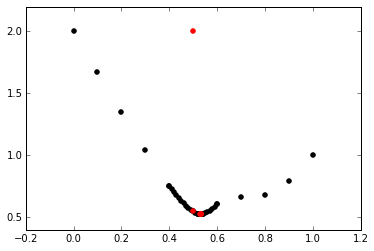

gMin is 0.527432091365
Fri Aug 14 19:45:55 2015    gMinStats

         1067528 function calls (1056693 primitive calls) in 58.590 seconds

   Ordered by: cumulative time
   List reduced from 1079 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002   58.590   58.590 <string>:1(<module>)
        1    0.000    0.000   58.588   58.588 <ipython-input-6-c0904c328114>:180(main)
        1    0.008    0.008   52.672   52.672 <ipython-input-6-c0904c328114>:81(getGMin)
       97    0.004    0.000   50.062    0.516 <ipython-input-6-c0904c328114>:22(getGS)
       97    0.061    0.001   50.056    0.516 arpack.py:1291(eigsh)
     9826   28.904    0.003   49.900    0.005 arpack.py:529(iterate)
     9921    0.110    0.000   21.343    0.002 base.py:282(__mul__)
     9729    0.056    0.000   20.996    0.002 base.py:233(dot)
     9729    0.145    0.000   20.820    0.002 compressed.py:447(_mul_vector)
     9729   20.196    0.002

<pstats.Stats instance at 0x7f25f8742830>

In [6]:
# Author: Kelsey C. Justis
# Date: 08/14/2015
# Summary: Program computes gMin for a given range of n, number of particles for all possible m clauses for each n.
# Then plots averaged tComp against alpha for all the Hp instances of the current alpha with a unique solution only.
# Input:
##- Minimum number of particles.
##- Maximum number of particles.
# Output: 
##- Plot of average tComp for alpha with unique solution Hps for every possible value of alpha in the given n range.

%matplotlib inline
import numpy as np
from makeHp import makeHp
from makeHd import makeHd
import scipy.sparse.linalg as spla
import cProfile
import pstats
import matplotlib.pyplot as plt


# Get gap for given Hamiltonian.
def getGS(Hamiltonian):
    numEvals = 0# Initialize the number of eigenvalues found to 0.
    maxIter = 1000000 # Initialize the maximum number of iterations the solver should go through to find the desired eigenvalues.
    tolerance = 1E-4 # Initialize the tolerance desired before eigenvalue solver stops iterating to find more accurate eigenvalue.
                     # "Relative accuracy for eigenvalues (stopping criterion). The default value of 0 implies machine precision."

    # Try the ARPACK sparse eigenvalue solver function until we have two "good" eigenvalues.
    while (numEvals < 2):

        # Try to use solver with current stopping criterion (iterations and tolerance).
        try:
            # Get eigenvalues for ground and first excited state for given Hamiltonian.
            eVal1, eVal2 = np.sort(spla.eigsh(Hamiltonian, 2, which = 'SA', return_eigenvectors = False, tol = tolerance, maxiter = maxIter))

            # If we have no eigenvalues yet and the eigenvalue function worked.
            if (numEvals == 0):
                eValGrnd = min(eVal1,eVal2) # Give the smaller of the given two from the eigenvalue function.
                eValExc = max(eVal1,eVal2)  # Give the greater of the given two from the eigenvalue function.

            # If we already have one eigenvalue and the eigenvalue function worked.
            elif(numEvals == 1):
                eValGrnd = min(eValGrnd,eVal1,eVal2) # Give the smaller of the previously found eigenvalue and the given two from the current eigenvalue function.
                eValExc = max(eValGrnd,eVal1,eVal2)  # Give the greater of the previously found eigenvalue and the given two from the current eigenvalue function.

            # Calculate the gap.
            gS = abs(eValExc - eValGrnd)

            # If the gap and the tolerance are within a magnitude of each other.
            if (gS/tolerance < 10.):
                tolerance = tolerance/10. # Make the tolerance smaller.
                numEvals = 0              # Recalculate eigenvalues with smaller tolerance.
            else:
                numEvals = 2  # We found eigenvalues with good enough precision.

        # For some reason the ARPACK eigenvalue solver function did not work.
        except spla.ArpackNoConvergence as err1:

            # Increase the number of iterations (time) it may take to try and find a "good" eigenvalue.
            maxIter = maxIter*10

            # If we the solver failed toprovide two eigenvalues but found one eigenvalue.
            if (len(err1.eigenvalues) == 1):

                # If we do not have any eigenvalues.
                if (numEvals == 0):
                    eValGrnd = err1.eigenvalues[0] # Use this eigenvalue as the lowest eigenvalue found.

                # If we already have an eigenvalue.
                elif(numEvals == 1):
                    eValGrnd = min(eValGrnd,err1.eigenvalues[0]) # Give the smaller of the previously found eigenvalue and the given one from the current eigenvalue function.
                    eValExc = max(eValGrnd,err1.eigenvalues[0]) # Give the greater of the previously found eigenvalue and the given one from the current eigenvalue function.

                # We found an eigenvalue.
                numEvals += 1

    # Return the gap found.
    return gS

# Finds gMin for a given driver (Hd) and problem (Hp) Hamiltonians.
def getGMin(Hp, Hd):

    # Set initial values for gMin search process.
    gMin  = getGS(Hd)            # Get initial gap and use as gMin.
    optTEvol = 0.                # Optimal evolution time.
    acc = 0.0001               # Define accuracy desired as percent difference between sequential gMin values found.
    prevgMin = gMin/acc # Initialize old gMin value to a gMin value far outside our desired range of agreement

    # Initialize search grid over s.
    sDelta = 0.1  # Defines step between s values to search.
    sGMin = 0.5   # Set an initial s value (in center) for where gMin is located.

    i = 0

    # Clear current figures and hold next drawings to come.
    plt.cla()
    plt.close("all")
    plt.hold(1)
    
    gMins = [gMin]
    sgMins = [sGMin]

    print gMin
    # While the difference between subsequent gMin found is greater than our accuracy desired.
    while (abs((prevgMin - gMin)/prevgMin) > acc) or (i<5):
        prevgMin = gMin # Record the old gMin that has been succeeded.
        # For each of the s values in the range of s around our suspected location of gMin.
        for s in np.arange(max((sGMin - sDelta*10),0),(min((sGMin + sDelta*10),1)) + sDelta, sDelta):
           gS = getGS(((1 - s)*Hd + s*Hp)) # Get gap for current s value.
           optTEvol += (sDelta)/(gS**2) # Update optTevol.
           print 'g(' + str(s) + '): ' + str(gS)
           # Check if this gap is the smallest found in this range.
           if (gS < gMin):

               # Update this iteration's discovered gMin and record its location in the range of s.
               gMin = gS
               sGMin = s

           # Plot against alpha.
           plt.figure(1)
           # Plot tComp vs. alpha for current value of n.
           plt.scatter(s,gS, color='k') # Plot dots.
           plt.plot(s,gS, color='k',ls = '-.') # Connect the dots.

        sDelta = sDelta/10
        gMins = np.hstack([gMins,gMin])
        sgMins = np.hstack([sgMins,sGMin])
        i +=1

        print '\nprevGmin: ' + str(prevgMin) + '\ncurrGMin: ' + str(gMin)

    plt.scatter(sgMins,gMins, color='r') # Plot dots.
    plt.show()
    print 'gMin is ' + str(gMin)
    # Return the gMin found for this alpha.
    return gMin#, optTEvol

# Plots gMin vs alpha for given range of particles.
def plotGminVsAlpha(minNumParticles,maxNumParticles):
    gMin = 0
    for numParticles in range(minNumParticles,maxNumParticles +1):

        # Define initial and problem Hamiltonians.
        Hd = makeHd(numParticles)

        # Initialize number of clauses to check past alpha =1 where there are no unique instances.
        numClauses = numParticles + 25

         # Maximum number of unique clauses for given n, num of particles
        maxNumClauses = numClauses
        print numClauses
        # While we have not checked each possible m up to mMax.
        while (numClauses <= maxNumClauses):
            # print '\n#Particles = ' + str(numParticles) + '\n#Clauses = ' + str(numClauses)
            # Counter used to make sure enough instances are tried to ensure current alpha does not have an Hp with a unique solution.
            numInstancesTried = 0

            # Initialize count of Hp with unique solution for current alpha.
            numUniHp = 0

            # Make sure we enough Hp for given alpha.
            while ((numInstancesTried < 100) and (numUniHp < 1)):

                # Create a new Hp with given number of particles and clauses.
                hpResults = makeHp(numParticles,numClauses)

                # If a unique solution Hp get gMin.
                if ((len(hpResults[2])) == 1):
                    Hp = hpResults[0] # Get current Hp instance.
                    numUniHp = 1 # Increase count for number of Hp with unique solutions.
                    gMin = getGMin(Hp,Hd) # Get gMin for current Hp instance.

                # Increase number of instances tried.
                numInstancesTried += 1

            # Go to next appropriate alpha in tests.
            numClauses +=1
    return gMin

def main(numParticles,numClauses):

    # Define initial and problem Hamiltonians.
    Hd = makeHd(numParticles)

    # Maximum number of unique clauses for given n, num of particles
    maxNumClauses = numClauses + 1

    # While we have not checked each possible m up to mMax.
    while (numClauses < maxNumClauses):
        print '\n#Particles = ' + str(numParticles) + '\n#Clauses = ' + str(numClauses)

        # Counter used to make sure enough instances are tried to ensure current alpha does not have an Hp with a unique solution.
        numInstancesTried = 0

        # Initialize count of Hp with unique solution for current alpha.
        numUniHp = 0

        # Make sure we enough Hp for given alpha.
        while ((numInstancesTried < 100) and (numUniHp < 1)):

            # Create a new Hp with given number of particles and clauses.
            hpResults = makeHp(numParticles,numClauses)

            # If a unique solution Hp get gMin.
            if ((len(hpResults[2])) == 1):
                Hp = hpResults[0] # Get current Hp instance.
                numUniHp = 1 # Increase count for number of Hp with unique solutions.
                getGMin(Hp,Hd) # Get gMin for current Hp instance.

            # Increase number of instances tried.
            numInstancesTried += 1

        if (numInstancesTried == 100):
            print 'Bad Alpha'
        numClauses +=1
cProfile.run('main(15,90)','gMinStats')
p = pstats.Stats('gMinStats')
p.strip_dirs()
p.sort_stats('cumulative').print_stats(20)

Testing gMin search code to make sure telescoping on gMin correctly from iteration to iteration on values of s.